In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

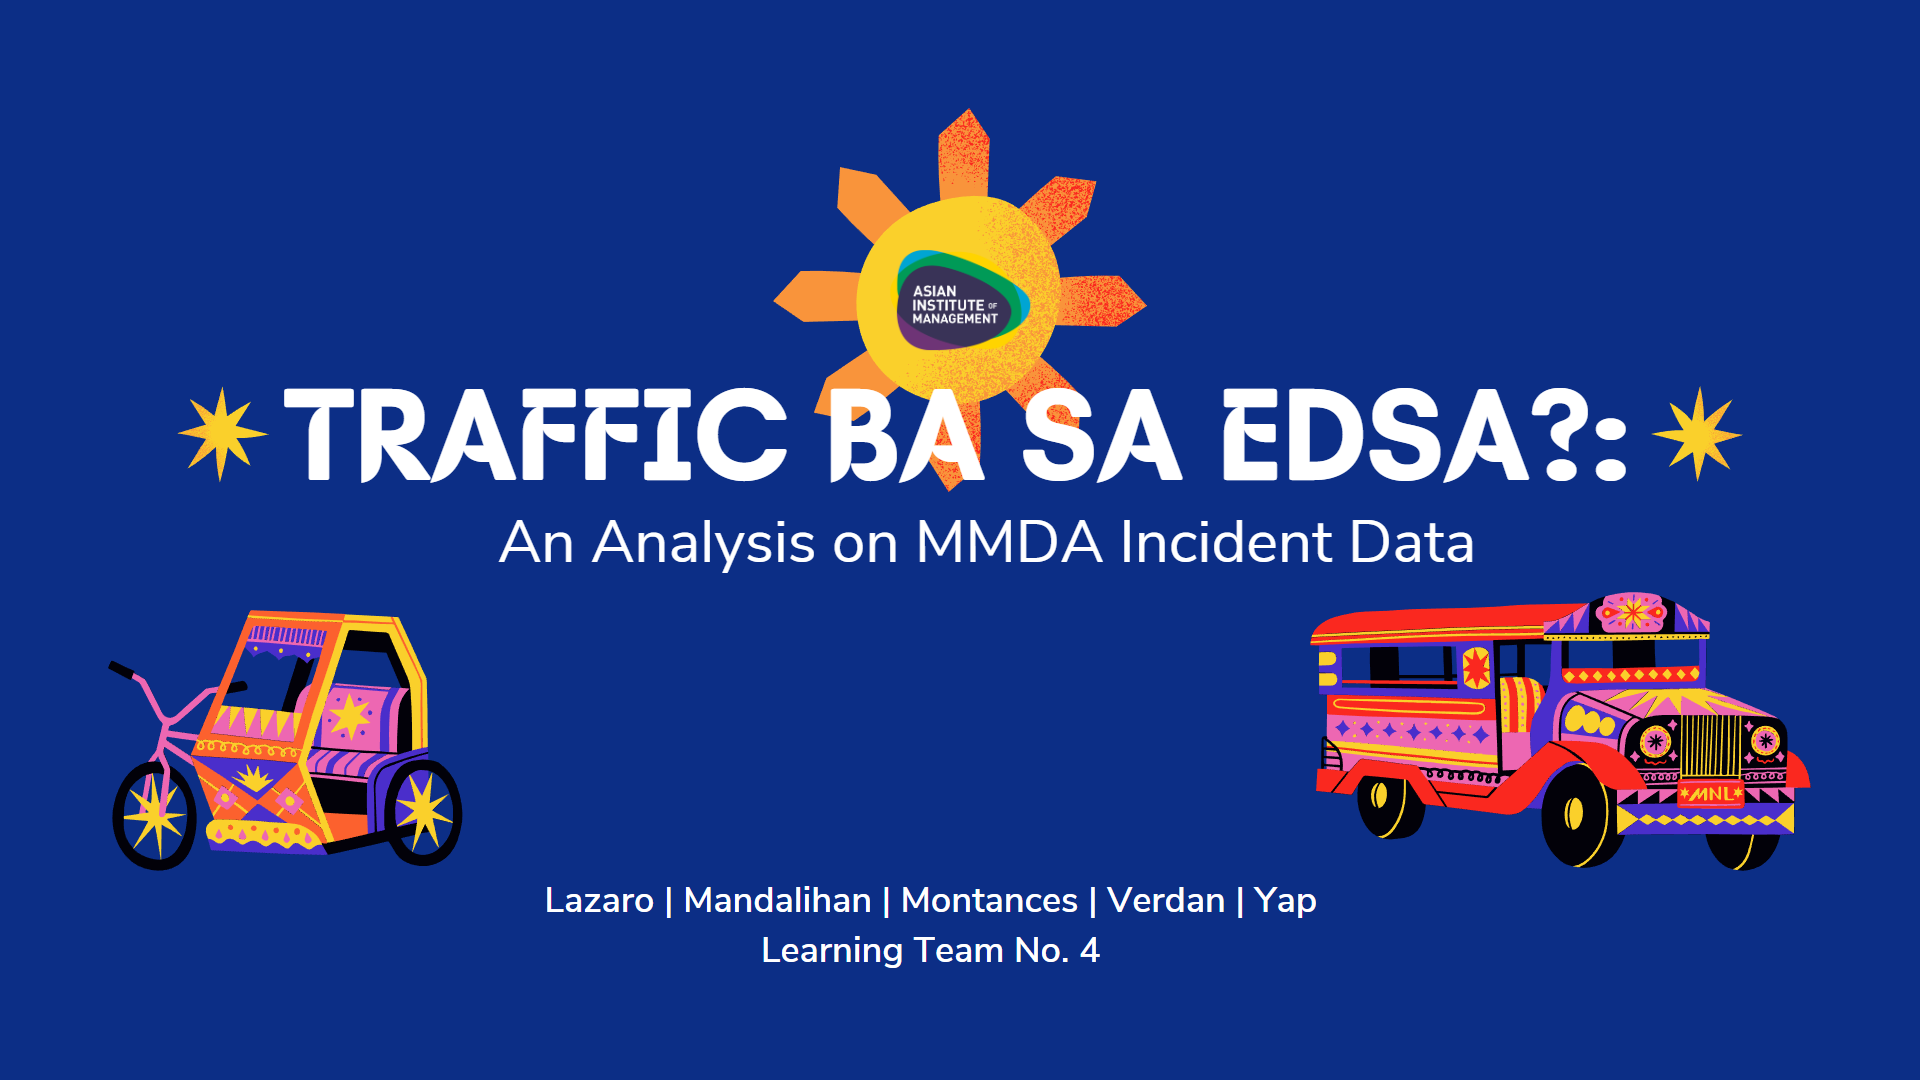

In [2]:
from IPython.display import Image, display
Image('edsa.png')

## Executive Summary

Epifanio delos Santos Avenue, most commonly known as EDSA, is one of the most traversed road in Metro Manila given the geographical setting of the area. Given its accessibility, approximately 410,000 vehicles pass through EDSA daily which is way above its traffic capacity of 300,000 vehicles. This high number contributes among others factors give higher risk to road accidents such as vehicle collision, malfunction and unschedule road repairs which furthers increase the traffic issues EDSA currently has. 

With this motivation in mind, this paper aims to provide insights from the incident dataset (August 2018 to December 2020) that is scraped from the Official Metropolitan Manila Development Authority (MMDA) Twitter page using Exploratory Data Anaysis and few statistical methods. The main goal of the report is to pinpoint and narrow down high risk area of EDSA as well as the time period and day of the week that should be classified as high risk.

To help us provide insights, ANOVA, Dunn's Test, Boostrap and Multiple Testing were used on the dataset. This helped us classify with confidence that Quezon City, Mandaluyong and Makati are the high risk cities in EDSA while San Juan have the lowest risk. Checking for the day of the week suggests only Sunday has a lower risk while the other days of the week have equal risks. The test for hours of the day determines two cluster with high risk, between 7AM to 11AM in the morning and between 3PM up to 5PM in the afternoon.

The insights mentioned can help MMDA in allotting resources to the high risk areas and high risk time period. They also focus their study on the said areas and periods to check for solution on minimizing the occurence of incidents. Lastly, MMDA should consider the high risk points as the main target for new or revised protocol to help alleviate the traffic in EDSA. 

## Introduction

**Background**

EDSA, named after Epifanio delos Santos, is Metro Manila's main thoroughfare stretching around 24 kilomters from Caloocan City in the north, to Pasay City down south. EDSA serves as a major connector between the Northern and Southern part of the
metropolitan area, as well as South Luzon to North Luzon in general, due to the geographical setting of the metropolitan area. It is an essential component of the spatial structuration of the Manila metropolitan area. Its powerful role in shaping the geography of activities within the metropolitan area is apparent with the location of the shopping malls, car dealerships, business centers, hotels, government agencies and provincial bus terminals alongside this axis of circulation. 

The excellent accessibility of EDSA sites has clearly attracted a lot of commercial investment and strategic implantation. However the abundance of shopping centers, office plazas, and places of employment generates at the same time an enormous amount of traffic on EDSA. According to Metropolitan Manila Development Authority (MMDA) data, about 350,000 people use the EDSA roadway everyday (156.000 vehicles, with a density of 565 vehicles/kilometer). In September 2022, the average annual daily traffic skyrocketed to 410,000 vehicles which is higher than pre-pandemic numbers and way higher than the daily traffic capacity of EDSA which is only 300,000 vehicles.

Due to this high volume count, road incidents such as vehicle collision, breakdown, repairs, etc are likely to happen in EDSA. In 2019, EDSA is one the most accident-prone road in Metro Manila, with a total of 17,382 road crashes from fatal and non-fatal causing injuries and damage to properties. EDSA is also listed as third deadliest road with 19 fatalities from vehicular miscues, only behind Commonwealth Avenue and Circumferential Road 5 (C-5).

**Objectives**

The focus of this study aims to provide insights on how the Metropolitan Manila Development Authority (MMDA) can improve their personnel deployment and emergency response. Given the worsening traffic condition of EDSA, one of the solutions is for better allocation of resources to minimize the disturbance caused by these incidents.

The study is divided on three questions where the assessment will revolve:

- Which part of EDSA has the highest incident count?
- What time of the day has the highest incident count?
- Which day of the week has incidents occuring the highest?

**Limitations**

The study has two major limitations in the used dataset which can affect the results and insights:

`Data verification`:
This study is limited to the tweets posted by the Official Twitter page of MMDA. There may be cases where an incident occurs but is not reported and posted on the Twitter page. We also limited our location insights to the city where the incident occurs since the location column which indicated the more specific area of the incident has a lot of unique values and may need further cleaning to be generate more accurate insights.

`Time period`:
This study is also limited by the time covered of the dataset which is from August 2018 up to December 2020. There are also gaps from June 2020 to September 2020 where there are no data on the incidents. As a workaround, insights concerning time are focused on the hour and day of the week.

`Data segmentation`:
This study is limited to the incidents occuring in EDSA based on the original dataset. However, there are mismatches for the location column with respect to the latitude and longitude values with location indicating that it is in EDSA while the coordinates indicate otherwise. Assumption for this is to follow the location column since the latitude and longitude were added as additional features. 


## Methodology

To acquire the best insights, the following methodology is used for this study:

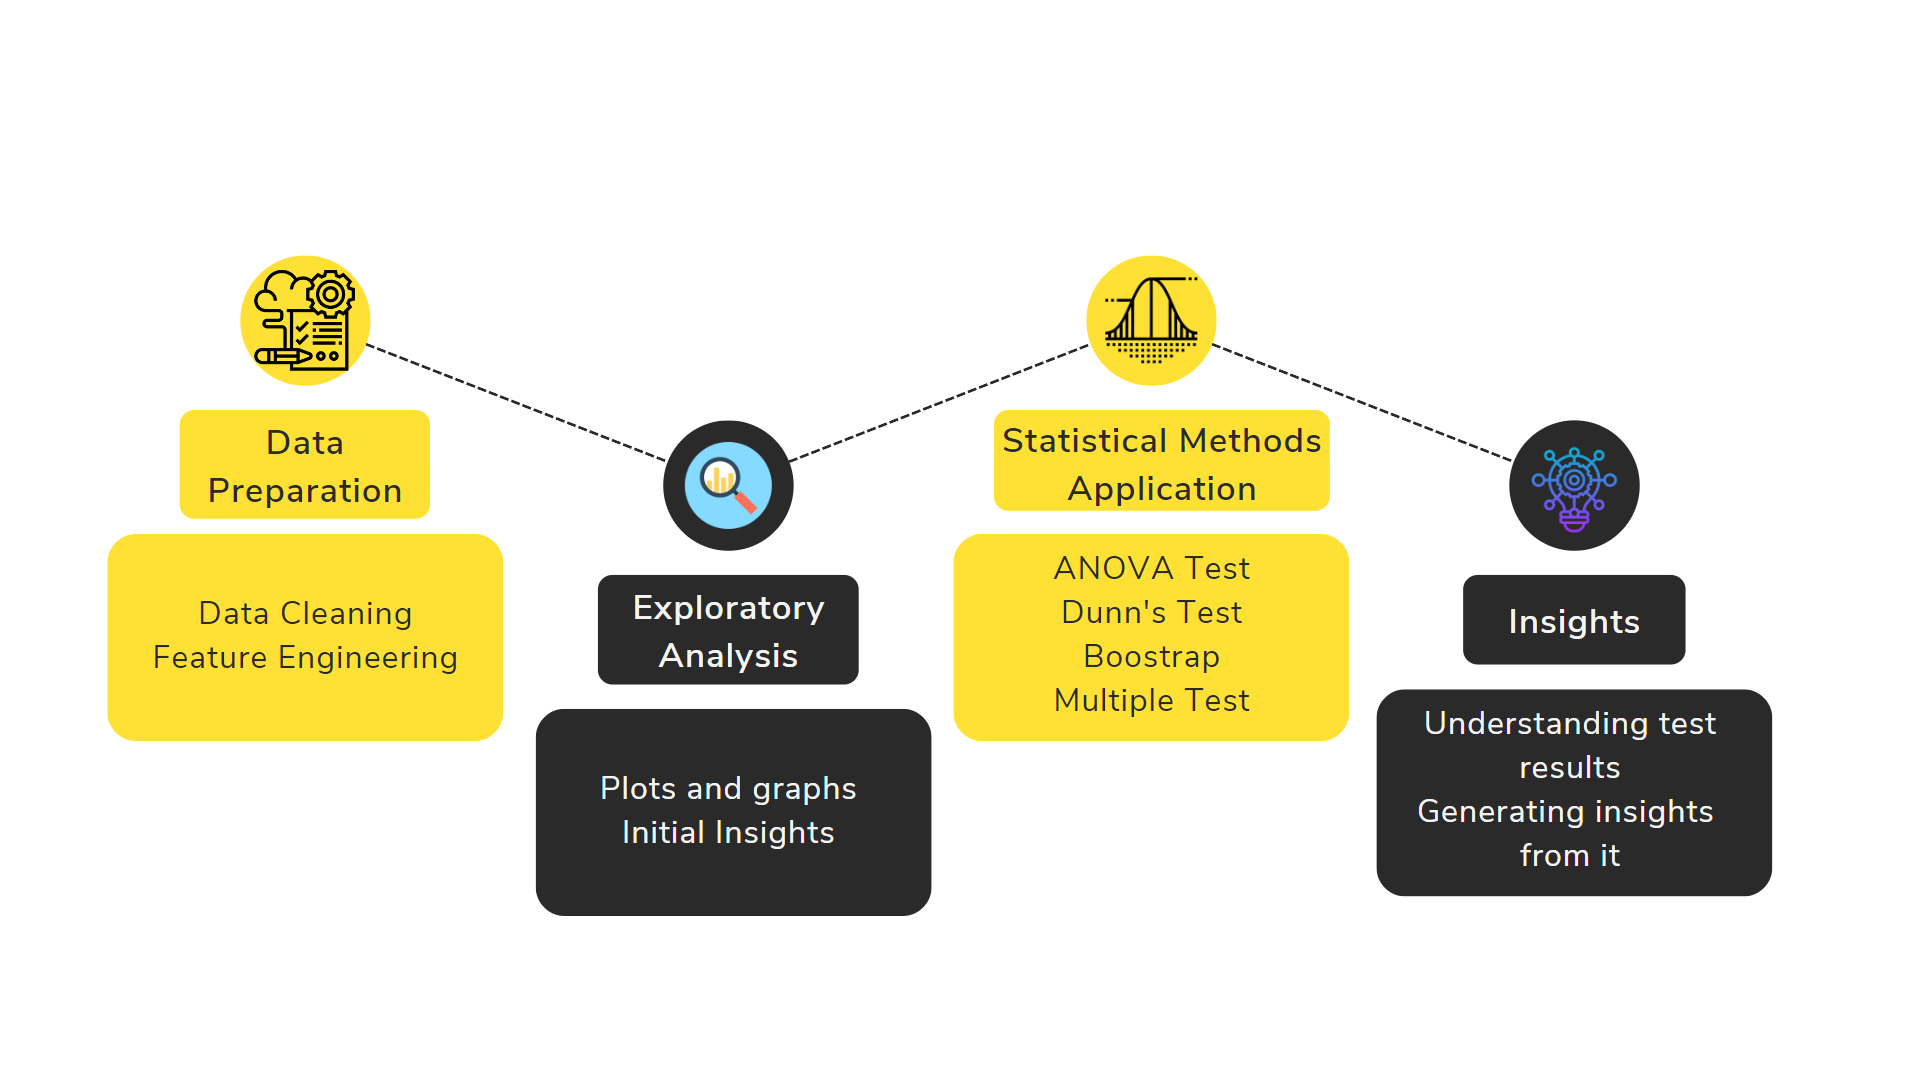

In [3]:
Image('methodology.png')

In [4]:
# for data manipulation
import pandas as pd
import numpy as np
import math

# for statistical method
from scipy.stats import t
from statsmodels.stats.multitest import multipletests
from scipy.stats import f
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# for plotting data
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

!pip install -q scikit-posthocs
import scikit_posthocs as sp

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-u8y68noy because the default path (/home/jverdan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


### Data Description

The dataset is a list of tweets pertaining to incidents (accidents, vehicular breakdown, etc) in Metro Manila that is parsed from the official MMDA Twitter page. The data was gathered through the Twitter API and is parsesd through the tweet text to get the relevant data. It contains information about a particular incident which includes date and time of occurence, location (with coordinates), type of incident, vehicle type involved, and the source link of the tweet. Period of the dataset if from August 2018 up to December 2020.

In [5]:
import pandas as pd
df = pd.read_csv('data_mmda_traffic_spatial.csv')
display(df.head(3))
df.shape

,Date,Time,Country,City,Location,Latitude,Longitude,High_Accuracy,Direction,Type,Lanes_Blocked,Involved,Tweet,Source
0,12/27/2020,11:10 AM,Philippines,Mandaluyong,EDSA QUEZON AVE,14.582431,121.054467,1,NB,MULTIPLE COLLISION,2.0,"MOTORCYCLE, SUV AND TAXI",MMDA ALERT: MULTIPLE COLLISION AT EDSA QUEZON ...,https://twitter.com/mmda/status/13430359602676...
1,12/27/2020,12:30 PM,Philippines,Quezon City,EDSA EUGENIO LOPEZ DRIVE,14.639692,121.040453,1,SB,VEHICULAR ACCIDENT,1.0,2 MOTORCYCLE,MMDA ALERT: VEHICULAR ACCIDENT AT EDSA EUGENIO...,https://twitter.com/mmda/status/13430580429930...
2,12/27/2020,12:59 PM,Philippines,Manila,QUIRINO GUAZON PETRON,14.585503,120.993783,1,SB,VEHICULAR ACCIDENT,1.0,MOTORCYCLE,MMDA ALERT: VEHICULAR ACCIDENT AT QUIRINO GUAZ...,https://twitter.com/mmda/status/13430604432589...


(17312, 14)

### Data Preparation

The preparation of data involves cleaning of data which includes dealing with null values, feature engineering in order to easily manipulate the values and aligning the dataset to the objectives of the study. The dataset is aligned with the objectives by only including locations of the incident occuring at EDSA. After which is to group incidents with the following: the hour of day of occurence divided by each hour, the day of the week when the incident occcured and the part of EDSA, indicated by its city, where the incident took place.

In [6]:
df['Involved'] = df['Involved'].fillna('NONE')
df['Direction'] = df['Direction'].fillna('NA')
df['City'] = df['City'].fillna('NA')
df.dropna(subset=['Type'], inplace=True)
df.dropna(subset=['Time'], inplace=True)
df.dropna(subset=['Location'], inplace=True)
df.loc[df['City'] == 'ParaÃ±aque', 'City'] = 'Parañaque'
df[~df['Time'].str[-2:].isin(['AM', 'PM'])]['Time']
df['Time'] = df['Time'].str.strip()
df.drop(df[~df['Time'].str[-2:].isin(['AM', 'PM'])].index, inplace=True)
df['Hour of Day'] = df['Time'].str.split(':').str[0] + df['Time'].str[-2:]
df.loc[df['Hour of Day'].str[0] == '0', 'Hour of Day'] = df.loc[df['Hour of Day'].str[0] == '0', 'Hour of Day'].str[1:]
df.loc[df['Hour of Day'] == '22PM', 'Hour of Day'] = '10PM'

In [7]:
df_edsa = df.loc[df['Location'].str.contains('EDSA')]
df_edsa = df_edsa.rename(columns={'Source': 'Count'})
df_edsa['Count'] = 1
df_edsa['Timestamp'] = pd.to_datetime(df_edsa['Date'], errors='coerce')
df_edsa = df_edsa.sort_values('Timestamp')
df_edsa['Month'] = pd.to_datetime(df['Date']).dt.month_name()
df_edsa['Day of Week'] = pd.to_datetime(df['Date']).dt.day_name()
df_edsa['Lanes_Blocked'] = df_edsa['Lanes_Blocked'].fillna(0)
df_edsa.loc[3774, 'Timestamp'] = pd.to_datetime('2019-12-03' + ' ' + '22:55')
df_edsa.loc[df['City'].str.contains('Makati City'), 'City'] = 'Makati'
df_edsa.loc[df['City'].str.contains('Kalookan City'), 'City'] = 'Caloocan'
df_edsa.loc[df['City'].str.contains('Pasay City'), 'City'] = 'Pasay'
df_edsa.loc[df['City'].str.contains('Pasig City'), 'City'] = 'Pasig'
df_edsa.loc[1204, 'City'] = 'Pasig'
df_edsa.loc[891, 'City'] = 'Makati'
df_edsa.loc[530, 'City'] = 'Quezon City'
df_edsa.loc[213, 'City'] = 'Caloocan'
df_edsa.loc[170, 'City'] = 'Quezon City'
df_edsa.loc[16899, 'City'] = 'Mandaluyong'
df_edsa.loc[1816, 'City'] = 'Quezon City'
df_edsa = df_edsa.reset_index(drop=True)
df_stat= df_edsa[['Timestamp', 'Hour of Day', 'Day of Week', 'City', 'Count']]
df_stat # Main dataset

,Timestamp,Hour of Day,Day of Week,City,Count
0,2018-08-20,7AM,Monday,Quezon City,1
1,2018-08-20,8AM,Monday,Mandaluyong,1
2,2018-08-20,9AM,Monday,Makati,1
3,2018-08-20,8AM,Monday,Mandaluyong,1
4,2018-08-20,12PM,Monday,Quezon City,1
...,...,...,...,...,...
8386,2020-12-27,7PM,Sunday,Quezon City,1
8387,2020-12-27,3PM,Sunday,Quezon City,1
8388,2020-12-27,3PM,Sunday,Makati,1
8389,2020-12-27,12PM,Sunday,Quezon City,1


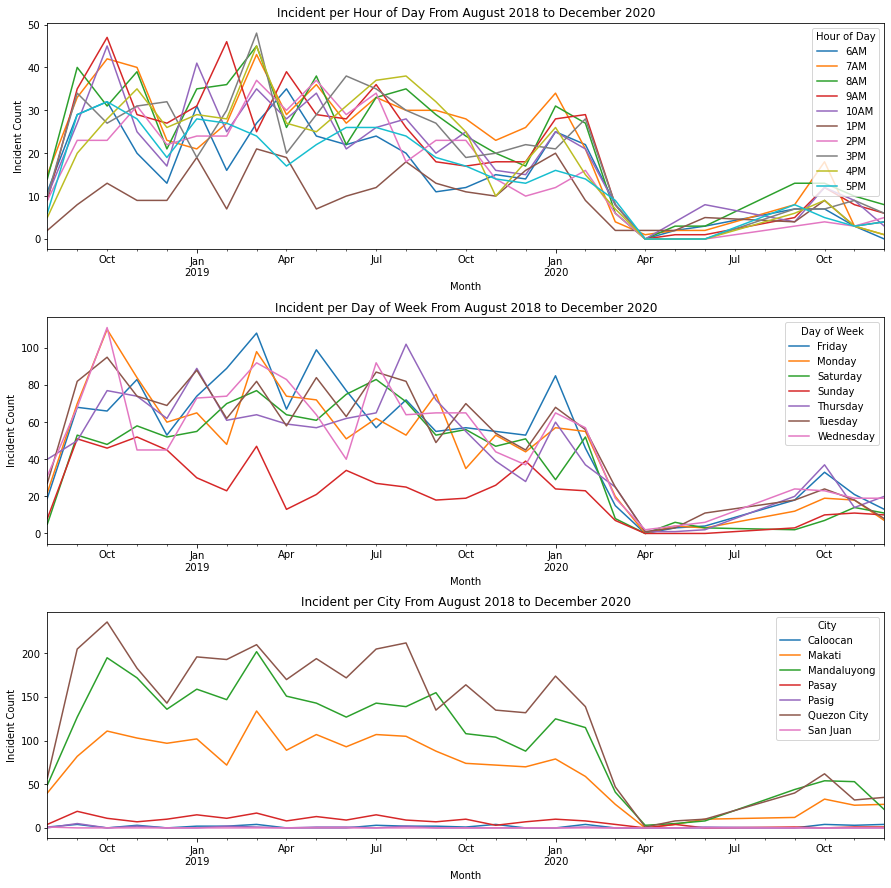

In [8]:
# Plotting
df_plot = df_edsa[['Timestamp', 'Hour of Day', 'Day of Week', 'City', 'Count']].copy()
df_plot['Timestamp'] = df_plot['Timestamp'].dt.to_period('M')

df_plotcity = df_plot.groupby(['Timestamp', 'City'])['Count'].size().reset_index()
df_plotcity = df_plotcity.pivot_table(values='Count', index='Timestamp', columns='City').fillna(0)

df_plotday = df_plot.groupby(['Timestamp', 'Day of Week'])['Count'].size().reset_index()
df_plotday = df_plotday.pivot_table(values='Count', index='Timestamp', columns='Day of Week').fillna(0)
    
hours = ['12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM',
         '9AM', '10AM','11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM',
         '6PM', '7PM','8PM', '9PM', '10PM', '11PM']

df_plothour = df_plot.groupby(['Timestamp', 'Hour of Day'])['Count'].size().reset_index()
df_plothour = df_plothour.pivot_table(values='Count', index='Timestamp', columns='Hour of Day').fillna(0)
df_plothour = df_plothour.reindex(hours, axis=1)


fig, ax = plt.subplots(ncols=1, nrows=3, figsize=[15, 15], gridspec_kw={'hspace':.3})
df_plothour[['6AM','7AM', '8AM', '9AM', '10AM', '1PM', '2PM', '3PM', '4PM', '5PM' ]].plot.line(ax=ax[0])
df_plotday.plot.line(ax=ax[1])
df_plotcity.plot.line(ax=ax[2])
ax[0].set(title='Incident per Hour of Day From August 2018 to December 2020', xlabel="Month", ylabel="Incident Count")
ax[1].set(title='Incident per Day of Week From August 2018 to December 2020', xlabel="Month", ylabel="Incident Count")
ax[2].set(title='Incident per City From August 2018 to December 2020', xlabel="Month", ylabel="Incident Count")
plt.show()

The Time Series plot displays the erratic trend due to the unpredictability of an accident occuring. However a few details can be interpreted. One is 1PM consistently has the lowest incident count among the hours of the day with highest incident count while the others have no definite pattern. For the days of the week, the same trend where Sunday has the lowest risk and the other six days have no no distinct differences. The cities can clearly determine that Quezon City, Mandaluyong and Makati have the highest risk while the others are low risk. This is expected since majority of EDSA are in those locations.

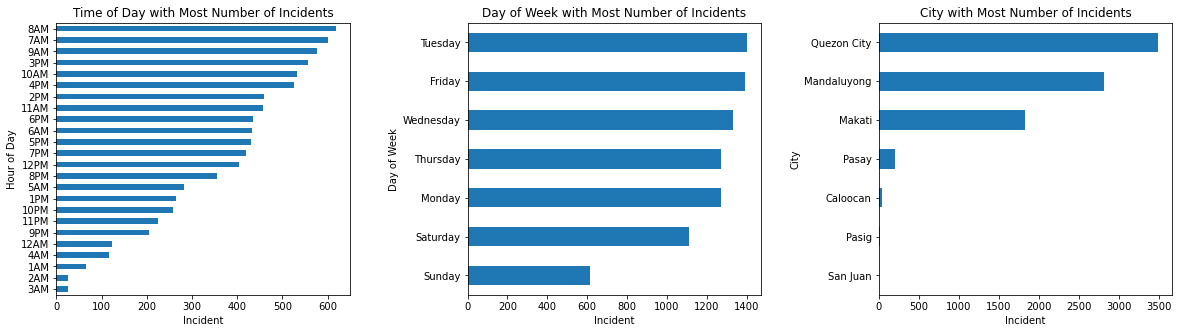

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=[20, 5], gridspec_kw={'wspace':.4})
df_stat.groupby('Hour of Day').size().sort_values(ascending=True).plot.barh(ax=ax[0],
                                                                            title='Time of Day with Most Number of Incidents',
                                                                            xlabel='Hour of Day')
df_stat.groupby('Day of Week').size().sort_values(ascending=True).plot.barh(ax=ax[1],
                                                                            title='Day of Week with Most Number of Incidents',
                                                                            xlabel='Day of Week')
df_stat['City'].value_counts().head(20).sort_values(ascending=True).plot.barh(ax=ax[2],
                                                                         title='City with Most Number of Incidents',
                                                                              xlabel='City', )
ax[0].set(xlabel="Incident")
ax[1].set(xlabel="Incident")
ax[2].set(xlabel="Incident")
fig.show()

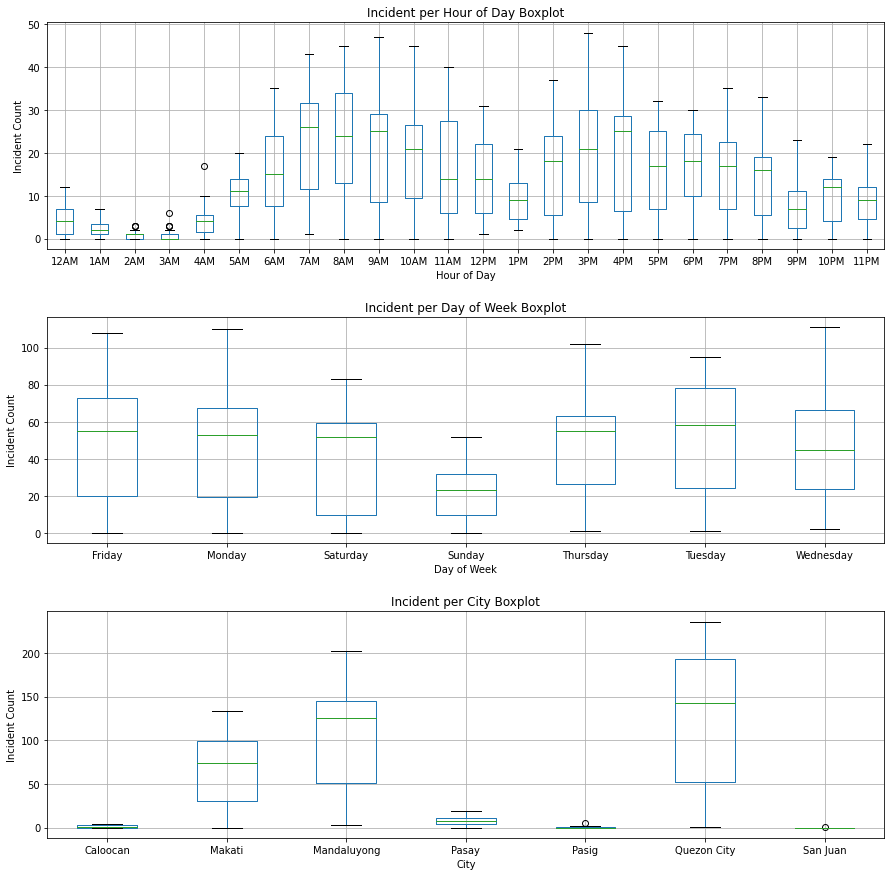

In [10]:
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=[15, 15], gridspec_kw={'hspace':.3})
df_plothour.boxplot(ax=ax[0])
df_plotday.boxplot(ax=ax[1])
df_plotcity.boxplot(ax=ax[2])
ax[0].set(title='Incident per Hour of Day Boxplot', xlabel="Hour of Day", ylabel="Incident Count")
ax[1].set(title='Incident per Day of Week Boxplot', xlabel="Day of Week", ylabel="Incident Count")
ax[2].set(title='Incident per City Boxplot', xlabel="City", ylabel="Incident Count")
plt.show()

The bar and box plots follows the insights from line plot for the days of the week and cities. For the hours of the day, it can be seen that the morning rush hour which is spans from 7AM to 11AM have the highest risk. The high risk period in the afternoon is 3PM to 5PM. The box plot indicates the high variance of the incident count to further highlight the unpredictability of the incidents.

In [11]:
df_map = df.loc[df['Location'].str.contains('EDSA')]
imap = folium.Map(location=[14.6091, 121.0223], tiles='openstreetmap', zoom_start=12)

mc = MarkerCluster()

for idx, row in df_map.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        mc.add_child(Marker([row['Latitude'], row['Longitude']]))

imap.add_child(mc)
imap

Mapping the incidents location provides a general sense of where the incidents occurs. However, given that the data uses a general latitude and longitude as its points, this highlights the clustering of the location to be per city. The specified location also needs further cleaning to be used properly. The incidents included that are not within the boundaries of EDSA in the map have locations specified in EDSA but have incorrect coordinates.

### Statistical Methods

**ANOVA**

Analysis of Variance (ANOVA) test is a type of statistical test used to determine if there is a statistically significant difference between two or more groups by testing the differences of their means using variance.

The hypotheses of interest in an ANOVA test given a baseline alpha are:

H0 (null hypothesis): All the means of the groups being tested are equal<br>
H1 (alternative hypothesis): The means of the groups are not all equal. <br>

The null hypothesis in ANOVA is always that there is no difference in means while the research or alternative hypothesis is always that the means are not all equal and is usually written in words rather than in mathematical symbols. Rejecting the null hypothesis means that at least one of the means are significantly different from the rest but cannot pinpoint the groups that have a difference in the means. For this study, ANOVA test will be used to determine if the means of the each category (city, day of week and hour of day) has significant difference with an alpha of 0.05.

**Dunn’s Test**

Dunn’s Test is a type of statistical test used to pinpoint which specific means are significant from the others. Dunn’s Test performs pairwise comparisons between each independent group and indicates which groups are statistically significantly different at some level of alpha. It is a post hoc which means the it is used after an initial test (normally ANOVA) and is non parametric test that doesn’t assume your data comes from a particular distribution.

It has the same hypothesis of interest as ANOVA wherein the null hypothesis for the test is that there is no difference between  the pair of groups being compared while the alternate hypothesis for the test is that there is a difference between the two groups.

Since this involves multiple comparisons at once, it is important that the family-wise error rate is controlled. One way to do so is to adjust the p-values that results from the multiple comparisons. For this study, Bonferroni's method will be used alongside the Dunn's Test.

For this study, Dunn's Test will be performed in order to classify which groups have different means from the rest if the ANOVA test rejects its null hypothesis. This can also help in clustering the groups in order to know which cities have similar risk of having an high incidents or what period of the day can be grouped as high risk hours.

**Bootstrap**

Bootstrapping is a statistical method that resamples a single dataset by simulating new datasets via sampling with replacement. This process allows for the calculation of statistic of interest, confidence intervals, and hypothesis testing. Bootstrap is a widely applicable and extremely powerful statistical tool that can be used to quantify the uncertainty associated with a given estimator or statistical learning method. Boostrapping was used in this study to calculate for the mean and standard deviation of the group to increase confidence on the values before performing multiple test.

**Multiple Test**

Multiple testing refers to a statistical method where a dataset is subjected to test multiple times, either at multiple time-points or through multiple subgroups or for multiple end-points. In Multiple Test, the process is to separately test each null hypothesis for each group since when two or more groups are being compared, there is always a chance of finding a difference between them just by random chance (Type 1 error). For this study, multiple test is used to check if the mean of each group is zero (null hypothesis) or non-zero (alternative hypothesis). This test can determine if there are locations or timestamp where incident are unlikely to occur so that resources can be allocated in other areas.

## Results and Discussion

**Looking at Incident Data Given the City**

In [12]:
df_city = df_stat.groupby(['Timestamp', 'City'])['Count'].size().reset_index()
df_city = df_city.pivot_table(values='Count', index='Timestamp', columns='City').fillna(0)
display(df_city.head())

City,Caloocan,Makati,Mandaluyong,Pasay,Pasig,Quezon City,San Juan
Timestamp,,,,,,,
2018-08-20,0.0,1.0,4.0,1.0,0.0,4.0,0.0
2018-08-21,0.0,2.0,0.0,1.0,0.0,4.0,0.0
2018-08-22,0.0,7.0,4.0,0.0,0.0,2.0,0.0
2018-08-23,0.0,8.0,4.0,0.0,0.0,9.0,0.0
2018-08-24,0.0,5.0,5.0,1.0,0.0,1.0,0.0


In [13]:
df_city.describe().round(2)

City,Caloocan,Makati,Mandaluyong,Pasay,Pasig,Quezon City,San Juan
count,697.00,697.00,697.00,697.00,697.00,697.00,697.00
mean,0.06,2.62,4.04,0.29,0.02,5.01,0.00
std,0.26,2.25,2.95,0.58,0.17,3.46,0.04
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,2.00,0.00,0.00,2.00,0.00
50%,0.00,2.00,4.00,0.00,0.00,5.00,0.00
75%,0.00,4.00,6.00,0.00,0.00,7.00,0.00
max,2.00,11.00,16.00,3.00,2.00,19.00,1.00


In [14]:
# ANOVA Test to check if all means are similar
alpha = 0.05
F_stat, p_value = f_oneway(df_city.iloc[:, 0], df_city.iloc[:, 1], df_city.iloc[:, 2], df_city.iloc[:, 3],
                           df_city.iloc[:, 4], df_city.iloc[:, 5], df_city.iloc[:, 6])
print(f'ANOVA Test for All Cities')
print(f'F-statistic = {F_stat:.4f}')
print(f'    p_value = {p_value:.4f}')

ANOVA Test for All Cities
F-statistic = 858.1069
    p_value = 0.0000


In [15]:
# Dunn's Test to check if pairwise means are similar
data = [df_city.iloc[:, 0], df_city.iloc[:, 1], df_city.iloc[:, 2],
        df_city.iloc[:, 3], df_city.iloc[:, 4], df_city.iloc[:, 5], df_city.iloc[:, 6]]
p_values = sp.posthoc_dunn(data, p_adjust='bonferroni')
p_values = p_values.rename(columns={1: 'Caloocan', 2: 'Makati', 3: 'Mandaluyong', 4: 'Pasay',
                                    5: 'Pasig', 6: 'Quezon City', 7: 'San Juan'},
                           index={1: 'Caloocan', 2: 'Makati', 3: 'Mandaluyong', 4: 'Pasay',
                                    5: 'Pasig', 6: 'Quezon City', 7: 'San Juan'})
p_values > alpha

,Caloocan,Makati,Mandaluyong,Pasay,Pasig,Quezon City,San Juan
Caloocan,True,False,False,False,True,False,True
Makati,False,True,False,False,False,False,False
Mandaluyong,False,False,True,False,False,False,False
Pasay,False,False,False,True,False,False,False
Pasig,True,False,False,False,True,False,True
Quezon City,False,False,False,False,False,True,False
San Juan,True,False,False,False,True,False,True


The ANOVA test for all the cities indicate that there are a substantial difference between the means of the cities' incident counts. This is expected since looking at their means; Quezon City, Mandaluyong and Makati have significant values compared to the other cities. 

Performing Dunn's Test on the cities, Pasig, Caloocan and San Juan have similar means which means they all fall under the low risk cities by observing their means. While the rest (Quezon City, Mandaluyong, Makati, and Pasay) have significantly different means from the rest.

In [16]:
# Bootstrap
sim_size = 200
mean_incident = []
std_incident = []
x = df_city.to_numpy()
for i in range(sim_size):
    
    n = len(x)
    samp_ind = np.random.choice(range(n), size=n, replace=True)
    x_boot = x[samp_ind]

    df_city_boot = pd.DataFrame(x_boot)
    mean_boot = df_city_boot.mean()
    std_boot = df_city_boot.std()
    mean_incident.append(mean_boot.to_list())
    std_incident.append(std_boot.to_list())

# Multiple Tests 
df_city_stat = pd.DataFrame(np.array(mean_incident).mean(axis=0), index=df_city.columns.to_list(), columns=['mean'])
df_city_stat['stdev'] = np.array(std_incident).mean(axis=0)
df_city_stat['t_stat'] = (df_city.mean()/df_city.std())*np.sqrt(df_city.shape[0])
df_city_stat['p_value'] = (1 - t.cdf(df_city_stat['t_stat'].abs(), df_city.shape[0]-1))*2
df_city_stat['Bonferroni'] = multipletests(df_city_stat['p_value'], alpha=alpha, method='bonferroni', is_sorted=True)[0]
df_city_stat['Bonferroni thresholds'] = multipletests(df_city_stat['p_value'], alpha=alpha, method='bonferroni', is_sorted=True)[1]
df_city_stat['Benjamini-Hochberg'] = multipletests(df_city_stat['p_value'], alpha=alpha, method='fdr_bh', is_sorted=True)[0]
df_city_stat['Benjamini-Hochberg thresholds'] = multipletests(df_city_stat['p_value'], alpha=alpha, method='fdr_bh', is_sorted=True)[1]
df_city_stat.sort_values('mean', ascending=False)

,mean,stdev,t_stat,p_value,Bonferroni,Bonferroni thresholds,Benjamini-Hochberg,Benjamini-Hochberg thresholds
Quezon City,5.003278,3.448400,38.250376,0.000000e+00,True,0.000000e+00,True,0.000000
Mandaluyong,4.043300,2.947992,36.137173,0.000000e+00,True,0.000000e+00,True,0.000000
Makati,2.621514,2.249665,30.639601,0.000000e+00,True,0.000000e+00,True,0.000000
Pasay,0.295782,0.576865,13.433164,0.000000e+00,True,0.000000e+00,True,0.000000
Caloocan,0.061126,0.261090,6.179752,1.092794e-09,True,7.649555e-09,True,0.000000
Pasig,0.023006,0.164797,3.608428,3.301296e-04,True,2.310907e-03,True,0.000000
San Juan,0.001406,0.028236,1.000000,3.176580e-01,False,1.000000e+00,False,0.317658


For the Multiple Tests, all Cities except San Juan can reject the null hypthesis that its mean is equal to zero. This means that all cities have a non-zero mean value. This is intuitive since the San Juan has little span along EDSA which means less incidents should occur. Looking at the values, Quezon City has the highest risk for an incident but also has the highest standard deviation. Next on the high risk locations are Mandaluyong and Makati which follows the trend of also having high standard deviation.

**Looking at Incident Data given the Day of the Week**

In [17]:
df_day1 = df_stat.groupby(['Timestamp', 'Day of Week'])['Count'].size().reset_index()
df_day1.pivot_table(values='Count', index='Timestamp', columns='Day of Week').fillna(0)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_day = pd.DataFrame()
for day in days:
    df_d = df_day1.loc[df_day1['Day of Week'] == day].pivot_table(values='Count', index='Timestamp', columns='Day of Week').reset_index(drop=True)
    df_day = pd.concat([df_day, df_d] , axis=1)
    
df_day = df_day.head(90)
display(df_day.head())

Day of Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,10.0,7,13.0,21.0,12,5.0,8.0
1,12.0,20,18.0,19.0,7,13.0,7.0
2,18.0,19,18.0,16.0,17,14.0,4.0
3,16.0,16,10.0,10.0,17,4.0,8.0
4,15.0,22,9.0,10.0,19,13.0,14.0


In [18]:
df_day.describe().round(2)

Day of Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,90.00,90.00,90.00,90.00,90.00,90.00,90.00
mean,13.70,14.93,14.11,13.51,14.67,12.07,6.80
std,7.43,6.96,7.15,6.23,7.19,6.25,4.03
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,7.00,11.00,10.00,9.00,9.25,8.00,4.00
50%,14.00,16.00,14.00,14.00,15.00,12.00,6.00
75%,18.00,19.00,18.00,18.00,20.75,16.00,10.00
max,34.00,31.00,32.00,24.00,27.00,27.00,18.00


In [19]:
# ANOVA Test to check if means are similar
F_stat, p_value = f_oneway(df_day.iloc[:, 0], df_day.iloc[:, 1], df_day.iloc[:, 2], df_day.iloc[:, 3],
                           df_day.iloc[:, 4], df_day.iloc[:, 5], df_day.iloc[:, 6])
print(f'ANOVA Test for All Days of the Week')
print(f'F-statistic = {F_stat:.4f}')
print(f'    p_value = {p_value:.4f}')

ANOVA Test for All Days of the Week
F-statistic = 16.6387
    p_value = 0.0000


In [20]:
# Dunn's Test to check if pairwise means are similar
data = [df_day.iloc[:, 0], df_day.iloc[:, 1], df_day.iloc[:, 2], df_day.iloc[:, 3],
                           df_day.iloc[:, 4], df_day.iloc[:, 5], df_day.iloc[:, 6]]
p_values = sp.posthoc_dunn(data, p_adjust='bonferroni')
p_values = p_values.rename(columns={1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
                                    5: 'Friday', 6: 'Saturday', 7: 'Sunday'},
                           index={1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
                                    5: 'Friday', 6: 'Saturday', 7: 'Sunday'})
p_values > alpha

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Monday,True,True,True,True,True,True,False
Tuesday,True,True,True,True,True,True,False
Wednesday,True,True,True,True,True,True,False
Thursday,True,True,True,True,True,True,False
Friday,True,True,True,True,True,True,False
Saturday,True,True,True,True,True,True,False
Sunday,False,False,False,False,False,False,True


The ANOVA test for all days of the week shows that their means are not similar. Looking at the means, the reason for this is that Sunday have a significant difference in its mean compared to the other which is expected given that less cars travel on a Sunday.

Performing Dunn's Test on the groups, Sunday is the only group that have significant difference in the mean. The other days of the week have means that are actually similar. This means that even if it is a Saturday, which is part of the weekend, it has similar incident count mean compared to a weekday and should be considered as high risk.

In [21]:
# Bootstrap

sim_size = 200
mean_incident = []
std_incident = []
x = df_day.to_numpy()
for i in range(sim_size):
    
    n = len(x)
    samp_ind = np.random.choice(range(n), size=n, replace=True)
    x_boot = x[samp_ind]

    df_day_boot = pd.DataFrame(x_boot)
    mean_boot = df_day_boot.mean()
    std_boot = df_day_boot.std()
    mean_incident.append(mean_boot.to_list())
    std_incident.append(std_boot.to_list())

# Multiple Tests
    
df_day_stat = pd.DataFrame(np.array(mean_incident).mean(axis=0), index=days, columns=['mean'])
df_day_stat['stdev'] = np.array(std_incident).mean(axis=0)
df_day_stat['t_stat'] = (df_day.mean()/df_day.std())*np.sqrt(df_day.shape[0])
df_day_stat['p_value'] = (1 - t.cdf(df_day_stat['t_stat'].abs(), df_day.shape[0]-1))*2
df_day_stat['Bonferroni'] = multipletests(df_day_stat['p_value'], alpha=alpha, method='bonferroni', is_sorted=True)[0]
df_day_stat['Bonferroni thresholds'] = multipletests(df_day_stat['p_value'], alpha=alpha, method='bonferroni', is_sorted=True)[1]
df_day_stat['Benjamini-Hochberg'] = multipletests(df_day_stat['p_value'], alpha=alpha, method='fdr_bh', is_sorted=True)[0]
df_day_stat['Benjamini-Hochberg thresholds'] = multipletests(df_day_stat['p_value'], alpha=alpha, method='fdr_bh', is_sorted=True)[1]
df_day_stat.sort_values('mean', ascending=False)

,mean,stdev,t_stat,p_value,Bonferroni,Bonferroni thresholds,Benjamini-Hochberg,Benjamini-Hochberg thresholds
Tuesday,14.984944,6.844198,20.368365,0.0,True,0.0,True,0.0
Friday,14.630556,7.149316,19.358121,0.0,True,0.0,True,0.0
Wednesday,14.126722,7.101658,18.729246,0.0,True,0.0,True,0.0
Monday,13.722611,7.329468,17.496705,0.0,True,0.0,True,0.0
Thursday,13.443444,6.154103,20.585765,0.0,True,0.0,True,0.0
Saturday,12.036000,6.194032,18.302657,0.0,True,0.0,True,0.0
Sunday,6.824333,4.018006,16.024420,0.0,True,0.0,True,0.0


For the Multiple Tests, all day of the week can reject the null hypthesis that its mean is equal to zero. This means any day of the week including Sunday can have an incident occuring. Looking at their means, Tuesday has the highest risk followed by Friday. However given the results of the Dunn's Test, the means of Monday to Saturday are statistically similar.

**Looking at Incident Data given the Hour of Day**

In [22]:
hours = ['12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM',
         '9AM', '10AM','11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM',
         '6PM', '7PM','8PM', '9PM', '10PM', '11PM']

df_hour = df_stat.groupby(['Timestamp', 'Hour of Day'])['Count'].size().reset_index()
df_hour = df_hour.pivot_table(values='Count', index='Timestamp', columns='Hour of Day').fillna(0)
df_hour = df_hour.reindex(hours, axis=1)
display(df_hour.head())

Hour of Day,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,...,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-08-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2018-08-21,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-08-22,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-08-23,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,2.0,...,1.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0
2018-08-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0


In [23]:
df_hour.describe().round(2)

Hour of Day,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,...,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
count,697.00,697.00,697.00,697.00,697.00,697.00,697.00,697.00,697.00,697.00,...,697.00,697.00,697.00,697.00,697.00,697.00,697.00,697.00,697.00,697.00
mean,0.18,0.09,0.04,0.04,0.17,0.40,0.62,0.86,0.89,0.83,...,0.66,0.80,0.75,0.62,0.62,0.60,0.51,0.29,0.37,0.32
std,0.47,0.33,0.19,0.22,0.45,0.72,0.91,1.11,1.13,1.05,...,0.93,1.06,1.02,0.94,0.96,0.92,0.91,0.61,0.66,0.63
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00
max,3.00,3.00,1.00,3.00,5.00,6.00,5.00,6.00,7.00,6.00,...,5.00,8.00,6.00,5.00,6.00,5.00,12.00,3.00,5.00,4.00


In [24]:
# ANOVA Test to check if means are similar (AM)
F_stat, p_value = f_oneway(df_hour.iloc[:, 0], df_hour.iloc[:, 1], df_hour.iloc[:, 2], df_hour.iloc[:, 3],
                          df_hour.iloc[:, 4], df_hour.iloc[:, 5], df_hour.iloc[:, 6], df_hour.iloc[:, 7],
                          df_hour.iloc[:, 8], df_hour.iloc[:, 9], df_hour.iloc[:, 10], df_hour.iloc[:, 11],
                          df_hour.iloc[:, 12], df_hour.iloc[:, 13], df_hour.iloc[:, 14], df_hour.iloc[:, 15],
                          df_hour.iloc[:, 16], df_hour.iloc[:, 17], df_hour.iloc[:, 18], df_hour.iloc[:, 19],
                          df_hour.iloc[:, 20], df_hour.iloc[:, 21], df_hour.iloc[:, 22], df_hour.iloc[:, 23])
print(f'ANOVA Test for All Hours of Day')
print(f'F-statistic = {F_stat:.4f}')
print(f'    p_value = {p_value:.4f}')

ANOVA Test for All Hours of Day
F-statistic = 72.9202
    p_value = 0.0000


In [25]:
# Dunn's Test to check if pairwise means are similar (AM)
data = [df_hour.iloc[:, 0], df_hour.iloc[:, 1], df_hour.iloc[:, 2], df_hour.iloc[:, 3],
      df_hour.iloc[:, 4], df_hour.iloc[:, 5], df_hour.iloc[:, 6], df_hour.iloc[:, 7],
      df_hour.iloc[:, 8], df_hour.iloc[:, 9], df_hour.iloc[:, 10], df_hour.iloc[:, 11]]
p_values = sp.posthoc_dunn(data, p_adjust='bonferroni')
p_values = p_values.rename(columns={1: '12AM', 2: '1AM', 3: '2AM', 4: '3AM', 5: '4AM', 6: '5AM',
                        7: '6AM', 8: '7AM', 9: '8AM', 10: '9AM', 11: '10AM', 12: '11AM'},
               index={1: '12AM', 2: '1AM', 3: '2AM', 4: '3AM', 5: '4AM', 6: '5AM',
                        7: '6AM', 8: '7AM', 9: '8AM', 10: '9AM', 11: '10AM', 12: '11AM'})
p_values > alpha

,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM
12AM,True,True,False,False,True,False,False,False,False,False,False,False
1AM,True,True,True,True,True,False,False,False,False,False,False,False
2AM,False,True,True,True,False,False,False,False,False,False,False,False
3AM,False,True,True,True,False,False,False,False,False,False,False,False
4AM,True,True,False,False,True,False,False,False,False,False,False,False
5AM,False,False,False,False,False,True,False,False,False,False,False,False
6AM,False,False,False,False,False,False,True,False,False,False,True,True
7AM,False,False,False,False,False,False,False,True,True,True,True,False
8AM,False,False,False,False,False,False,False,True,True,True,True,False
9AM,False,False,False,False,False,False,False,True,True,True,True,False


In [26]:
# ANOVA Test to check which means in the morning rush hour are similar
F_stat, p_value = f_oneway(df_hour.iloc[:, 7], df_hour.iloc[:, 8], df_hour.iloc[:, 9], df_hour.iloc[:, 10])
print(f'ANOVA Test for Hours Between 7AM to 11AM')
print(f'F-statistic = {F_stat:.4f}')
print(f'    p_value = {p_value:.4f}')
print(f'-------------------------------')
F_stat, p_value = f_oneway(df_hour.iloc[:, 6], df_hour.iloc[:, 7], df_hour.iloc[:, 8], df_hour.iloc[:, 9], df_hour.iloc[:, 10])
print(f'ANOVA Test for Hours Between 6AM to 11AM')
print(f'F-statistic = {F_stat:.4f}')
print(f'    p_value = {p_value:.4f}')
print(f'-------------------------------')
F_stat, p_value = f_oneway(df_hour.iloc[:, 7], df_hour.iloc[:, 8], df_hour.iloc[:, 9], df_hour.iloc[:, 10],  df_hour.iloc[:, 11])
print(f'ANOVA Test for Hours Between 7AM to 12NN')
print(f'F-statistic = {F_stat:.4f}')
print(f'    p_value = {p_value:.4f}')

ANOVA Test for Hours Between 7AM to 11AM
F-statistic = 1.7341
    p_value = 0.1578
-------------------------------
ANOVA Test for Hours Between 6AM to 11AM
F-statistic = 7.1644
    p_value = 0.0000
-------------------------------
ANOVA Test for Hours Between 7AM to 12NN
F-statistic = 5.3905
    p_value = 0.0003


In [27]:
# Dunn's Test to check if pairwise means are similar (AM)
data = [df_hour.iloc[:, 12], df_hour.iloc[:, 13], df_hour.iloc[:, 14], df_hour.iloc[:, 15],
      df_hour.iloc[:, 16], df_hour.iloc[:, 17], df_hour.iloc[:, 18], df_hour.iloc[:, 19],
      df_hour.iloc[:, 20], df_hour.iloc[:, 21], df_hour.iloc[:, 22], df_hour.iloc[:, 23]]
p_values = sp.posthoc_dunn(data, p_adjust='bonferroni')
p_values = p_values.rename(columns={1: '12PM', 2: '1PM', 3: '2PM', 4: '3PM', 5: '4PM', 6: '5PM',
                        7: '6PM', 8: '7PM', 9: '8PM', 10: '9PM', 11: '10PM', 12: '11PM'},
               index={1: '12PM', 2: '1PM', 3: '2PM', 4: '3PM', 5: '4PM', 6: '5PM',
                        7: '6PM', 8: '7PM', 9: '8PM', 10: '9PM', 11: '10PM', 12: '11PM'})
p_values > alpha

,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
12PM,True,False,True,False,True,True,True,True,True,False,False,False
1PM,False,True,False,False,False,False,False,False,True,True,True,True
2PM,True,False,True,True,True,True,True,True,False,False,False,False
3PM,False,False,True,True,True,False,False,False,False,False,False,False
4PM,True,False,True,True,True,True,True,True,False,False,False,False
5PM,True,False,True,False,True,True,True,True,True,False,False,False
6PM,True,False,True,False,True,True,True,True,True,False,False,False
7PM,True,False,True,False,True,True,True,True,True,False,False,False
8PM,True,True,False,False,False,True,True,True,True,False,True,False
9PM,False,True,False,False,False,False,False,False,False,True,True,True


In [28]:
# ANOVA Test to check which means in the afternoon rush hour are similar
F_stat, p_value = f_oneway(df_hour.iloc[:, 15], df_hour.iloc[:, 16])
print(f'ANOVA Test for Hours Between 3PM to 5PM')
print(f'F-statistic = {F_stat:.4f}')
print(f'    p_value = {p_value:.4f}')
print(f'-------------------------------')
F_stat, p_value = f_oneway(df_hour.iloc[:, 14], df_hour.iloc[:, 15], df_hour.iloc[:, 16])
print(f'ANOVA Test for Hours Between 2PM to 5PM')
print(f'F-statistic = {F_stat:.4f}')
print(f'    p_value = {p_value:.4f}')
print(f'-------------------------------')
F_stat, p_value = f_oneway(df_hour.iloc[:, 15], df_hour.iloc[:, 16], df_hour.iloc[:, 17])
print(f'ANOVA Test for Hours Between 3PM to 6PM')
print(f'F-statistic = {F_stat:.4f}')
print(f'    p_value = {p_value:.4f}')

ANOVA Test for Hours Between 3PM to 5PM
F-statistic = 0.6368
    p_value = 0.4250
-------------------------------
ANOVA Test for Hours Between 2PM to 5PM
F-statistic = 3.4824
    p_value = 0.0309
-------------------------------
ANOVA Test for Hours Between 3PM to 6PM
F-statistic = 6.2081
    p_value = 0.0021


The ANOVA test for all hours of the day indicates that their means are not similar which is expected since the volume of cars traversing EDSA differs at a certain period of time. The usual pattern is that there is a rush hour in the morning and afternoon and less cars will travel by dawn and night.

Looking at the results of the Dunn's Test for the daytime, 2 clusters can be determined: 12AM to 5AM and 6AM to 11AM. However, looking at the means of the first cluster, they should be considered as low risk compared to the second cluster. It is expected that the second cluster will be a high risk since it is the time when most cars occupy EDSA given that offices and schools open at the same time. For the afternoon group, the clustering is 12PM to 9PM and 9PM to 12AM with the high risk being the first cluster given that office and school ends at this period.

In order to check if the high risk hours can be narrowed down for the two rush hours, ANOVA was performed on the two clusters separately. It resulted to the morning rush hour being high risk between 7AM to 11AM since adding 6AM or 11AM will cause the test to reject the null hypothesis. For the afternoon rush hour, the high risk period is between 3PM up to 5PM.

In [29]:
# Bootstrap

sim_size = 200
mean_incident = []
std_incident = []
x = df_hour.to_numpy()
for i in range(sim_size):
    
    n = len(x)
    samp_ind = np.random.choice(range(n), size=n, replace=True)
    x_boot = x[samp_ind]

    df_hour_boot = pd.DataFrame(x_boot)
    mean_boot = df_hour_boot.mean()
    std_boot = df_hour_boot.std()
    mean_incident.append(mean_boot.to_list())
    std_incident.append(std_boot.to_list())

# Multiple Tests    

df_hour_stat = pd.DataFrame(np.array(mean_incident).mean(axis=0), index=hours, columns=['mean'])
df_hour_stat['stdev'] = np.array(std_incident).mean(axis=0)
df_hour_stat['t_stat'] = (df_hour.mean()/df_hour.std())*np.sqrt(df_hour.shape[0])
df_hour_stat['p_value'] = (1 - t.cdf(df_hour_stat['t_stat'].abs(), df_hour.shape[0]-1))*2
df_hour_stat['Bonferroni'] = multipletests(df_hour_stat['p_value'], alpha=alpha, method='bonferroni', is_sorted=True)[0]
df_hour_stat['Bonferroni thresholds'] = multipletests(df_hour_stat['p_value'], alpha=alpha, method='bonferroni', is_sorted=True)[1]
df_hour_stat['Benjamini-Hochberg'] = multipletests(df_hour_stat['p_value'], alpha=alpha, method='fdr_bh', is_sorted=True)[0]
df_hour_stat['Benjamini-Hochberg thresholds'] = multipletests(df_hour_stat['p_value'], alpha=alpha, method='fdr_bh', is_sorted=True)[1]
df_hour_stat.sort_values('mean', ascending=False)

,mean,stdev,t_stat,p_value,Bonferroni,Bonferroni thresholds,Benjamini-Hochberg,Benjamini-Hochberg thresholds
8AM,0.890689,1.127983,20.836468,0.000000e+00,True,0.000000e+00,True,0.0
7AM,0.861994,1.108405,20.522844,0.000000e+00,True,0.000000e+00,True,0.0
9AM,0.829670,1.057875,20.689112,0.000000e+00,True,0.000000e+00,True,0.0
3PM,0.799448,1.054772,19.931027,0.000000e+00,True,0.000000e+00,True,0.0
10AM,0.764075,1.027858,19.569936,0.000000e+00,True,0.000000e+00,True,0.0
4PM,0.754892,1.023265,19.493626,0.000000e+00,True,0.000000e+00,True,0.0
2PM,0.658099,0.929950,18.697308,0.000000e+00,True,0.000000e+00,True,0.0
11AM,0.653859,0.937835,18.409405,0.000000e+00,True,0.000000e+00,True,0.0
6PM,0.623214,0.962105,17.092884,0.000000e+00,True,0.000000e+00,True,0.0
6AM,0.621356,0.908967,18.060011,0.000000e+00,True,0.000000e+00,True,0.0


For the Multiple Tests, all hours of the day can reject the null hypthesis that its mean is equal to zero. This means any hour of the day has a likelihood to have an incident. Given that vehicles traverse along EDSA all the time due to night shift workers and some public transport operating 24 hours a day, it is highly likely that an incident will occur at any time of the day. Checking the means, the high risk times are 7AM to 11AM and 3PM to 5PM which is supported by the test done before.

## Conclusion

Given the insights that were determined in the exploratory data analysis, the following recommendations can be made:
 
 
**Metropolitan Manila Development Authority (MMDA)**

- MMDA can optimize personnel and resource allocation by prioritizing key locations and key time periods. With the identifies high risk location they may deploy more personnels in Quezon City and take advantage of having Mandaluyong and Makati being neighbor cities to share resource or map better deployment strategy. This information is especially useful in emergency situations.
- Given the unpredictability of an incident happening, MMDA should prioritize monitoring of the high risk areas. This should also help in identifying solutions that can minimize occurrence of future incidents as well as better response during these incidents when necessary.
- MMDA can use these results to set guidelines and protocols to minimize volume of cars in high risk areas and rush hours. (i.e more service lanes, lane assignment, etc). They should try to focus the key areas and periods when implementing new traffic policies and guidelines.

**Commuters and Private Vehicle owners**
- People can leverage and avoid the high risk hours to avoid longer travel time and risk of being involved in an incident
- Private cars can also take alternate routes to avoid certain locations on their way to their destination.

**Recommendations for Future Study**
- The report can be improved by looking at the locations more by specifying the location where the incident actually happen. This will allow robust study on the location side of the report and make the allocation of personnel and resources better since more specified locations will be highlighted.
- Looking at more different time period and current trends can be helpful in identifying the high risk areas and time period. There may be a shift in the hours given that companies are integrating work from home setups. Looking also at different guidelines will help in the study such as the switching of the bus lane from right side to left can be a difference in the number of incidents that occur in a location.

## References

- https://www.kaggle.com/datasets/esparko/mmda-traffic-incident-data

- https://news.abs-cbn.com/spotlight/multimedia/infographic/10/07/22/edsa-traffic-exceeds-pre-pandemic-volume

- https://www.unescap.org/sites/default/files/bulletin82_Article-4.pdf

- https://auto.yugatech.com/news/metro-manila-road-accidents-car-in-2021/

- https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistesting-anova/bs704_hypothesistesting-anova_print.html

- https://journals.sagepub.com/doi/pdf/10.1177/1536867X1501500117

- https://hastie.su.domains/ISLR2/ISLRv2_website.pdf